## Credit Card Fraud Detection - Mod05_Project

Data: https://www.kaggle.com/mlg-ulb/creditcardfraud

<b>Context</b>
    
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The goal of fraud detection algorithm would be to detect 100% of fraudulent activity, whilst minimising the number of falsely flagged non-fraudulent transactions. 
   
Therefore balance here is that a customer would rather they be contacted for a 

<b>Objective:</b>
    
* Highest Recall Possible, Whilst Matianing an accpetable Pression 

## Project Check List:

<b>Expectations:</b>
- CRISP-DM Structure

- Frame Problem

- Relevant Data Exploration / Analysis
    - How long of a time window does the data cover?
        - 2 Days
    - Normal transaction
        - When do most transaction occur
        - Amount
    - Fraudulent transactions:
        - Number / Ratio
        - When? Amount?
        - Correlation in variable

- Data Transformation: 
    - SMOTE / ADASYN
    - No PCA Required
    
- Model Comparison and Selection Based on Problem:
    - Logistic Reg (Baseline)
    - Support Vector Machine (SVM)
    - Stochastic Gradient Descent (SGD)
    
- Model Assumptions:
    - Standard Scaling?
    - Min/Max Scaling?
    - Normality?

- Model Optimization: Hyper Parameter / Threshold 
    - Wide GridSearchCV
        - Interpret Results
    - Narrow Search
        - Interpret Results
    - Final Model
        - Model interpretation
        - Recommendations
    - Prediction Function?

## Model Check List:

<b>Logistic Regression:</b>  
- Assumptions:
    - Standard Scaling
    
- Hyper parameter optimization:

- Threshold Selection:

- Model interpretation:

- Actionable Problem Solving Recommendations:



<b>Support Vector Machine:</b>
- Assumptions:
    - Standard Scaling
    - Min/Max Scaling? (Works on distance?)
    
- Hyper parameter optimization:

- Threshold Selection:

- Model interpretation:

- Actionable Problem Solving Recommendations:



<b>Stochastic Gradient Descent:</b>
- Assumptions:
    - Standard Scaling
    
- Hyper parameter optimization:

- Threshold Selection:

- Model interpretation:

- Actionable Problem Solving Recommendations:



In [1]:
# Custom Functions
from Credit_Func import *

# Import the Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Other
import pickle

# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import svm


from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<b>Fraud Analysis:</b>
* Volume of the Fraud

In [5]:
print(f"Data Shape: {df.shape}")
print(f"Not Fraud Cases: {df.shape[0] - df.Class.sum()}")
print(f"Fraud Cases: {df.Class.sum()} | {round((df.Class.sum() / df.shape[0])*100, 5)}%")

Data Shape: (284807, 31)
Not Fraud Cases: 284315
Fraud Cases: 492 | 0.17275%


<b>Time Analysis:</b>
* Time_max = 172792 seconds ~ 172800, which equates to 2 day for transactions.
* There for as 1 day = 86400 seconds,
* for Time > 86400: T-86400

In [6]:
# time = df['Time']
# day = []
# for d in time:
#     if d <= 86400:     # There are 86400 seconds in a day
#         day.append(0)
#     else:
#         day.append(1)

# df['Day'] = day
# # df['Day'].unique()

In [7]:
# day 2's time needs to have t-86400
time = df['Time']
new_time = []
for d in time:
    if d <= 86400:     # There are 86400 seconds in a day
        new_time.append(d)
    else:
        new_time.append(d - 86400)
        
df['Time'] = new_time      

# EDA

Observer the data, comparing the fraud and not fraud cases

In [8]:
# fraud_Y_d1 = df.loc[(df['Class'] == 1) & (df['Day'] == 0)]
# fraud_N_d1 = df.loc[(df['Class'] != 1) & (df['Day'] != 0)]
# fraud_Y_d2 = df.loc[(df['Class'] == 1) & (df['Day'] == 0)]
# fraud_N_d2 = df.loc[(df['Class'] != 1) & (df['Day'] != 0)]

In [9]:
# fig = plt.figure(figsize=(16,8))

# axes = fig.add_axes([0,0,1,1])

# # Fraud
# axes.plot(fraud_N_d1['Time'], fraud_N_d1['Amount'], label="Not_Fraud_Day1", alpha=0.2)
# axes.plot(fraud_N_d2['Time'], fraud_N_d2['Amount'], label="Not_Fraud_Day2", alpha=0.5)

# # Not Fraud
# axes.plot(fraud_Y_d1['Time'], fraud_Y_d1['Amount'], label="Fraud_Day1")
# axes.plot(fraud_Y_d2['Time'], fraud_Y_d2['Amount'], label="Fraud_Day2")

# axes.legend(loc=1)
# plt.title("Transaction Amounts Over Time Day 1", fontsize=18)
# plt.show()

In [10]:
# sns.lineplot(data=fraud_N, x='Time', y='Amount', hue='Class')

In [11]:
# Split the features

# time = df.Time
# amount = df.Amount
# V_df = df.drop(columns=['Time', 'Amount', 'Class'])

In [12]:
# # Plot the amount over time and color the data to the Fraud
# plt.figure(figsize=(16,8))
# sns.lineplot(data=df, x='Time', y='Amount', hue='Class')
# plt.title("Transaction Amounts Over Time", fontsize=18)
# plt.show()

In [13]:
# df.hist(column=['Class'], by=['Day'])

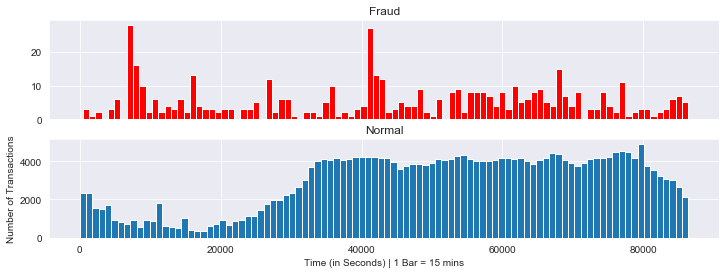

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = (24*4) # Each bar = 15 mins
ax1.hist(df.Time[df.Class == 1], bins = bins, color="red")
ax1.set_title('Fraud')
ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds) | 1 Bar = 15 mins')
plt.ylabel('Number of Transactions')
plt.show()

In [15]:
# plot_all(df, num_of_plots_per_row = 15, target = 'Class')

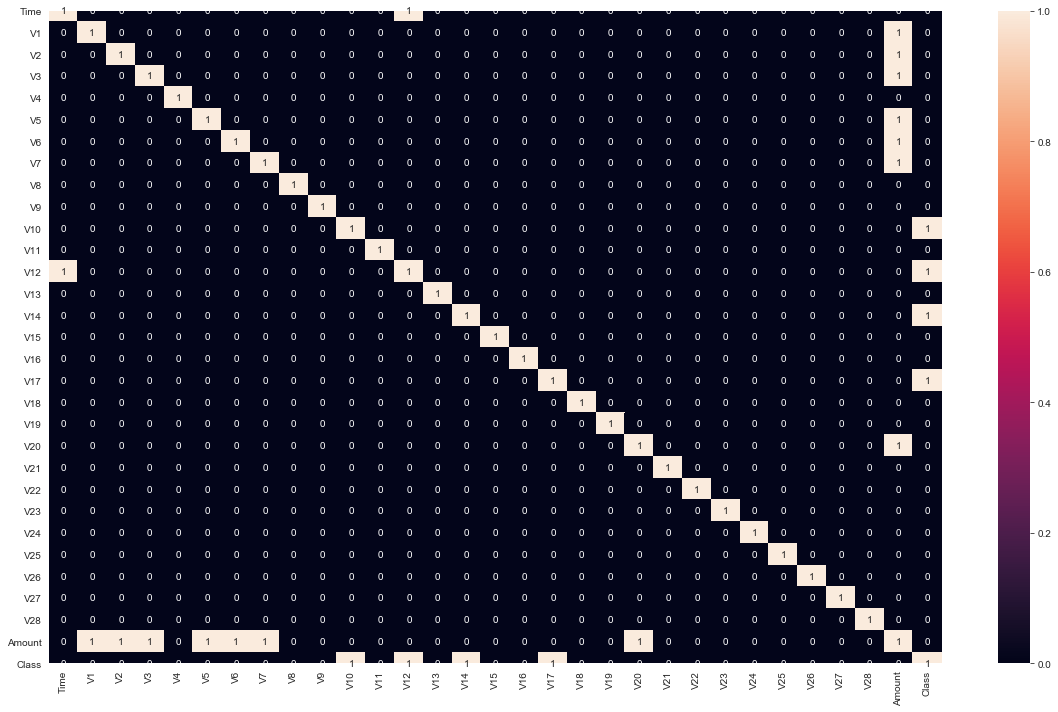

In [16]:
corr = abs(df.corr())
corr_abs = abs(corr) >=0.2
plt.figure(figsize=(20,12))
sns.heatmap(corr_abs, annot=True)

In [17]:
show_corr_to_target(corr_abs, 'Class')

['V10', 'V12', 'V14', 'V17']

# Preprocessing

## Train Test Split

In [18]:
y = df.Class

X = df.drop(columns=['Class'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data Shapes:")
print(f"X_tv: {X_tv.shape} | X_test: {X_test.shape} | y_tv {y_tv.shape} | y_test {y_test.shape}")

Data Shapes:
X_tv: (199364, 30) | X_test: (85443, 30) | y_tv (199364,) | y_test (85443,)


In [20]:
print(f"Number of Frauds in TV: {y_tv.sum()} | {round((y_tv.sum() / y_tv.shape[0])*100, 5)}%")
print(f"Number of Frauds in Test: {y_test.sum()} | {round((y_test.sum() / y_test.shape[0])*100, 5)}%")

Number of Frauds in TV: 356 | 0.17857%
Number of Frauds in Test: 136 | 0.15917%


In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.3, random_state=42)
print(f"X_train: {X_train.shape} | X_test: {X_val.shape} | y_train {y_train.shape} | y_test {y_val.shape}")

X_train: (139554, 30) | X_test: (59810, 30) | y_train (139554,) | y_test (59810,)


In [22]:
print(f"Number of Frauds in Train: {y_train.sum()} | {round((y_train.sum() / y_train.shape[0])*100, 5)}%")
print(f"Number of Frauds in Validation: {y_val.sum()} | {round((y_val.sum() / y_val.shape[0])*100, 5)}%")

Number of Frauds in Train: 258 | 0.18487%
Number of Frauds in Validation: 98 | 0.16385%


## Scaling

* All of the V variables are already scaled to StandardScalar, however doing it again won't make a difference

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_Val_transformed = scaler.transform(X_val)
X_test_transformed = scaler.transform(X_test)
trans = [X_train_transformed, X_Val_transformed, X_test_transformed]

for X in trans:
    print(("mean: "), np.round(X.mean(), 2))
    print(("standard dev: "), np.round(X.std(), 2))

mean:  0.0
standard dev:  1.0
mean:  -0.0
standard dev:  1.0
mean:  0.0
standard dev:  0.99


## Imbalanced Classes 

* SMOTE
* Up Sample of Minority Class

In [24]:
from imblearn.over_sampling import SMOTE, ADASYN

### SMOTE

In [25]:
# Previous original class distribution
print("original class distribution:")
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE(sampling_strategy='auto') # resample all classes but the majority class
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print("SMOTE_even class distribution")
print(pd.Series(y_train_smote).value_counts()) 

original class distribution:
0    139296
1       258
Name: Class, dtype: int64


SMOTE_even class distribution
1    139296
0    139296
Name: Class, dtype: int64


By the looks of this it has just done an up sampling of the minority class.

### ADASYN

In [26]:
# Previous original class distribution
print("original class distribution:")
print(y_train.value_counts())

# Fit SMOTE to training data
adasyn = ADASYN(sampling_strategy='auto') # resample all classes but the majority class
X_train_adasyn, y_train_adasyn = adasyn.fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print("ADASYN class distribution")
print(pd.Series(y_train_adasyn).value_counts()) 

original class distribution:
0    139296
1       258
Name: Class, dtype: int64


ADASYN class distribution
1    139384
0    139296
Name: Class, dtype: int64


# Models



Models:
1. Logistic Regression [Baseline]
2. K Nearest Neighbors (KNN)
3. Support Vector Machines

4. Random Forest
5. XGBoost

Models:
1. Decision Trees
2. Grid Search CV with Decision Trees
3. Random Forest
4. Grid Search CV with Random Forest
5. AdaBoost
6. Grid Search CV with AdaBoost
7. XGBoost
8. Feature Importances
9. K Nearest Neighbors (SMOTE optional)
10. SVM

## Logistic Regression

Parameters to iterate through:
* solvers = 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [28]:
print("Original Class Distribution:")
print(f"Num of [Normal:Fraud] -> [{y_train.count()-y_train.sum()}:{y_train.sum()}]")
print(f"Ratio of [Normal:Fraud] -> [{round(y_train.count()/y_train.sum(), 1)}:{1}]")

print("")

print("SMOTE_even Class Vistribution:")
print(f"Num of [Normal:Fraud] -> [{y_train_smote.count()-y_train_smote.sum()}:{y_train_smote.sum()}]")
print(f"Ratio of [Normal:Fraud] -> [{round(2*(y_train_smote.sum()/y_train_smote.count()), 1)}:{1}]")

Original Class Distribution:
Num of [Normal:Fraud] -> [139296:258]
Ratio of [Normal:Fraud] -> [540.9:1]

SMOTE_even Class Vistribution:
Num of [Normal:Fraud] -> [139296:139296]
Ratio of [Normal:Fraud] -> [1.0:1]


### Baseline Model

In [33]:
from sklearn.linear_model import LogisticRegression

No SMOTE

In [47]:
# Initial Model - NO SMOTE
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_val)
y_pred = logreg.predict(X_val)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_val, y_score)
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
print(f'Presison: {precision_score(y_val, y_pred)}')
print(f'Recall: {recall_score(y_val, y_pred)}')
print(f'f1_score: {f1_score(y_val, y_pred)}')

AUC: 0.8708484398582585
Presison: 0.38961038961038963
Recall: 0.6122448979591837
f1_score: 0.47619047619047616


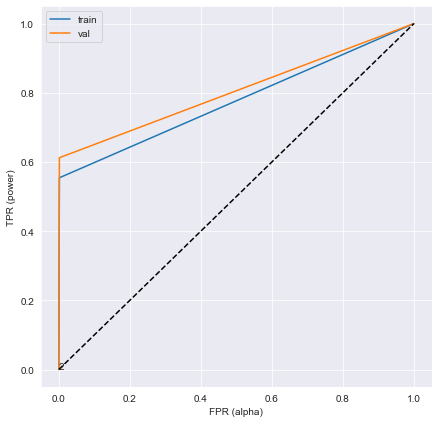

In [48]:
roc_plot(logreg,X_train,y_train,X_val,y_val)

SMOTE

In [49]:
# Initial Model - SMOTE
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
# Probability scores for test set
y_score = logreg.fit(X_train_smote, y_train_smote).decision_function(X_val)
y_pred = logreg.predict(X_val)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_val, y_score)
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
print(f'Presison: {precision_score(y_val, y_pred)}')
print(f'Recall: {recall_score(y_val, y_pred)}')
print(f'f1_score: {f1_score(y_val, y_pred)}')

AUC: 0.9519012689480937
Presison: 0.05446485117162761
Recall: 0.8775510204081632
f1_score: 0.10256410256410257


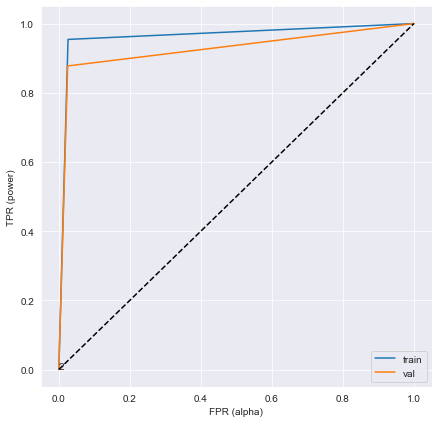

In [50]:
roc_plot(logreg,X_train_smote, y_train_smote,X_val,y_val)

### Broad Search Log Reg

In [65]:
# Construct LogitReg Pipeline
pipe_lr = Pipeline([('clf', LogisticRegression(fit_intercept=False, random_state=123))])

In [69]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [77]:
np.logspace(0, 10, 10)

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

In [82]:
# Logistic Grid Parameters
param_grid_lr = [{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100] 
                 ,'clf__solver': ['liblinear', 'lbfgs', 'saga']
                 #,'clf__penalty': ['l1', 'l2', 'elasticnet', None]
                 }]





# penalty = ['l1', 'l2', 'elasticnet', None]
# solver_list = ['clf_liblinear', 'clf_lbfgs', 'clf_saga', 'newton-cg','sag', 'saga']
# C = np.logspace(0, 4, 10)
# clf__C = [0.001, 0.01, 0.1, 1, 10, 100]

In [83]:
# Construct grid search
gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=param_grid_lr,
            scoring='roc_auc',
            cv=3, verbose=1,
            return_train_score = True,
            n_jobs=1, refit=True)

gs_lr.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ d

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=False,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=123,
                                                 

In [88]:
best_model = gs_lr.best_estimator_
scores(best_model,X_train_smote,X_val,y_train_smote,y_val)
print(gs_lr.best_params_)

train: 0.99 test: 0.94
{'clf__C': 0.01, 'clf__solver': 'lbfgs'}


In [140]:
y_pred = best_model.predict(X_val)

In [141]:
# Print Accuracy and heatmap
def acc(y_val,prediction):
    cm = confusion_matrix(y_val, prediction)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    print ('Recall:', recall)
    print ('Precision:', precision)
    print ('\n clasification report:\n', classification_report(y_val,prediction))
    print ('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
    print('\n Accuracy Percentage  is : {}%'.format(accuracy_score(y_val,prediction) * 100))
    ax = sns.heatmap([precision,recall],linewidths= 0.5,cmap='PuRd', annot=True)

Recall: [0.97280279 0.86734694]
Precision: [0.99977625 0.04973669]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     59712
           1       0.05      0.87      0.09        98

    accuracy                           0.97     59810
   macro avg       0.52      0.92      0.54     59810
weighted avg       1.00      0.97      0.98     59810


 confussion matrix:
 [[58088  1624]
 [   13    85]]

 Accuracy Percentage  is : 97.26299949841165%


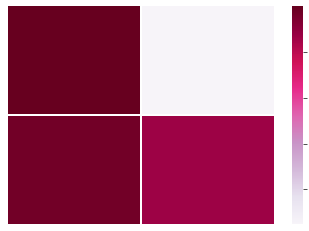

In [142]:
acc(y_val,y_pred)

In [126]:
def roc_plot(model,X_train,y_train,X_val,y_val):
    train_prob = model.predict(X_train)
    val_prob = model.predict(X_val)
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]:
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

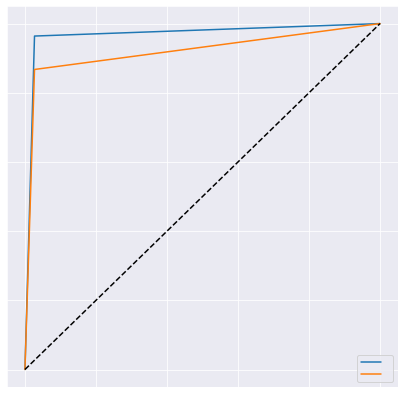

In [127]:
roc_plot(best_model,X_train_smote, y_train_smote,X_val,y_val)

In [102]:
def GS_Output_DataFrame(gs):
    opt = pd.DataFrame(gs.cv_results_)
    opt.set_index(['rank_test_score'])
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    return opt

In [105]:
opt_lr = GS_Output_DataFrame(gs_lr)
liblinear_results = opt_lr.loc[opt_lr['clf__solver'] == 'liblinear']
lbfgs_results = opt_lr.loc[opt_lr['clf__solver'] == 'lbfgs']
saga_results = opt_lr.loc[opt_lr['clf__solver'] == 'saga']

In [121]:
opt_lr['solver_num'] = [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3]

In [125]:
opt_lr.sort_values(by='mean_test_score',  ascending=False)

,clf__C,clf__solver,mean_test_score,std_test_score,mean_train_score,std_train_score,solver_num
4,0.010,lbfgs,0.993138,0.000233,0.993135,0.000193,2
7,0.100,lbfgs,0.992866,0.000697,0.992880,0.000737,2
16,100.000,lbfgs,0.992586,0.001113,0.992581,0.000846,2
13,10.000,lbfgs,0.992325,0.000925,0.992337,0.000938,2
10,1.000,lbfgs,0.992031,0.000804,0.992058,0.001089,2
15,100.000,liblinear,0.991667,0.000700,0.991676,0.000906,1
6,0.100,liblinear,0.991665,0.000700,0.991675,0.000906,1
9,1.000,liblinear,0.991664,0.000697,0.991673,0.000904,1
12,10.000,liblinear,0.991662,0.000696,0.991672,0.000903,1
3,0.010,liblinear,0.991637,0.000687,0.991646,0.000894,1


## Tight Logistic Regression Model

In [128]:
# Construct LogitReg Pipeline
pipe_lr = Pipeline([('clf', LogisticRegression(solver='lbfgs', fit_intercept=False, random_state=123))])

In [131]:
np.linspace(0.001, 0.1, 10)

array([0.001, 0.012, 0.023, 0.034, 0.045, 0.056, 0.067, 0.078, 0.089,
       0.1  ])

In [132]:
# Logistic Grid Parameters
param_grid_lr = [{'clf__C': np.linspace(0.001, 0.1, 10)}]

In [133]:
# Construct grid search
gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=param_grid_lr,
            scoring='roc_auc',
            cv=3, verbose=1,
            return_train_score = True,
            n_jobs=1, refit=True)

gs_lr.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=False,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=123,
                                                 

In [134]:
best_model = gs_lr.best_estimator_
scores(best_model,X_train_smote,X_val,y_train_smote,y_val)
print(gs_lr.best_params_)

train: 0.99 test: 0.94
{'clf__C': 0.08900000000000001}


In [ ]:
logreg_model = pickle.dumps(gs_lr)

In [ ]:
from joblib import dump, load
dump(gs_lr, 'logreg_model.joblib') 

In [137]:
opt_lr = GS_Output_DataFrame(gs_lr)
opt_lr.sort_values(by='mean_test_score',  ascending=False, inplace=True)
opt_lr.head()

,clf__C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,0.089,0.993428,0.000175,0.993438,0.000133
5,0.056,0.993061,0.000506,0.993080,0.000508
1,0.012,0.993055,0.000510,0.993054,0.000571
4,0.045,0.993003,0.000960,0.992998,0.000667
2,0.023,0.992891,0.000678,0.992876,0.000373


In [ ]:
plot_confusion_matix(y_val, y_pred, ['Normal', "Fraud"])

## K Nearest Neigbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Construct pipeline
pipe_knn = Pipeline([('clf', KNeighborsClassifier())])

In [52]:
pipe_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__algorithm', 'clf__leaf_size', 'clf__metric', 'clf__metric_params', 'clf__n_jobs', 'clf__n_neighbors', 'clf__p', 'clf__weights'])

In [55]:
# Set grid search params
param_grid_knn = [{'n_neighbors': [3, 5, 11, 19], 
                 #  'weight': ['uniform', 'distance'],
                   'metric': ['manhattan', 'euclidean'],
                   #'p':[1, 2] 
                  }]

# Construct grid search
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
            param_grid=param_grid_knn,
           # scoring='roc_auc',
            cv=3, verbose=1, return_train_score = True, n_jobs=1)

# Fit the model
gs_knn.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 10.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid=[{'metric': ['manhattan', 'euclidean'],
                          'n_neighbors': [3, 5, 11, 19]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [56]:
best_model = gs_knn.best_estimator_
print(gs_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3}


In [59]:
opt_knn = GS_Output_DataFrame(gs_knn)
opt_knn

,metric,n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
0,manhattan,3,0.986981,0.000242,0.993699,0.000152
1,manhattan,5,0.983797,0.000207,0.989783,0.000220
2,manhattan,11,0.976241,0.000109,0.981263,0.000087
3,manhattan,19,0.968226,0.000303,0.972474,0.000152
4,euclidean,3,0.965509,0.000125,0.984384,0.000056
5,euclidean,5,0.955401,0.000231,0.972284,0.000196
6,euclidean,11,0.934101,0.000740,0.946822,0.000510
7,euclidean,19,0.914542,0.000606,0.924702,0.000218


In [60]:
y_pred = best_model.predict(X_val)

Accuracy: 98.064%
Precision: 5.387%
Recall: 65.306%
f1_score: 9.953%
Frauds: 98 | Missed: 34.7%


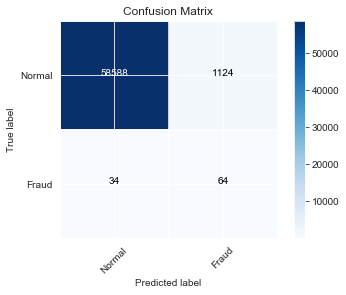

In [63]:
plot_confusion_matix(y_val, y_pred, ['Normal', "Fraud"])

In [58]:
sns.heatmap(pd.pivot_table(opt_knn,index='clf__n_neighbors',columns='clf__p',values='mean_train_score')*100)

KeyError: 'clf__n_neighbors'

Plan B

In [46]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    K = list(range(min_k, max_k, 1))
    presision = []
    recall = []
    accuracy = []
    f1_score = []
    for i in K:
        # Instantiate KNeighborsClassifier
        clf = KNeighborsClassifier(n_neighbors=i)

        # Fit the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        test_pred = clf.predict(X_val)
        test_prob = clf.predict_proba(X_val)

        # append out scores
       
        presision.append(precision_score(y_test, test_pred))
        recall.append(recall_score(y_test, test_pred))
        accuracy.append(accuracy_score(y_test, test_pred))
        f1_score.append(f1_score(y_test, test_pred))
        
    return pd.DataFrame(data=[K, presision, recall, accuracy, f1_score], 
                        columns=['K', 'presision', 'recall', 'accuracy', 'f1_score'])

In [47]:
opt_knn = find_best_k(X_train, y_train, X_val, y_val, min_k=3, max_k=25)
opt_knn

NameError: name 'test_preds' is not defined

## Stochastic Gradient Descent (SGD) Classifier

In [ ]:
# Construct pipeline
pipe_sgd = Pipeline([('clf', SGDClassifier(fit_intercept=False, random_state=123, max_iter=10000))])

# Set grid search params
param_grid_sgd = [{'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                   'penalty': 'elasticnet', 
                   'l1_ratio': [0, 0.15, 0.75, 1], # 0 is L2 only & 1 is L1 only.
                  # 'alpha': 
                  }]
 
# Construct grid search
gs_sgd = GridSearchCV(estimator=pipe_sgd,
            param_grid=param_grid_sgd,
            scoring='roc_auc',
            cv=3, verbose=2, return_train_score = True, n_jobs=1)

gs_sgd.fit(X_train_smote, y_train_smote)

In [ ]:
best_model = gs_sgd.best_estimator_
print(gs_sgd.best_params_)

In [ ]:
opt_sgd = GS_Output_DataFrame(gs_sgd)

In [ ]:
sns.heatmap(pd.pivot_table(opt_svm,index='clf__C',columns='clf__gamma',values='mean_train_score')*100)

## Support Vector Machine

In [34]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [35]:
pipe_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__C', 'clf__break_ties', 'clf__cache_size', 'clf__class_weight', 'clf__coef0', 'clf__decision_function_shape', 'clf__degree', 'clf__gamma', 'clf__kernel', 'clf__max_iter', 'clf__probability', 'clf__random_state', 'clf__shrinking', 'clf__tol', 'clf__verbose'])

In [36]:
# Construct pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123, max_iter=10000))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['sigmoid']}]

#  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['poly'], 'clf_degree': [3, 4]}]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='roc_auc',
            cv=3, verbose=2, return_train_score = True, n_jobs=1)

gs_svm.fit(X_train_smote, y_train_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... clf__C=0.1, clf__kernel=linear, total=  11.5s
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... clf__C=0.1, clf__kernel=linear, total=  11.8s
[CV] clf__C=0.1, clf__kernel=linear ..................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... clf__C=0.1, clf__kernel=linear, total=  11.1s
[CV] clf__C=1, clf__kernel=linear ....................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... clf__C=1, clf__kernel=linear, total=  13.3s
[CV] clf__C=1, clf__kernel=linear ....................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... clf__C=1, clf__kernel=linear, total=  11.6s
[CV] clf__C=1, clf__kernel=linear ....................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... clf__C=1, clf__kernel=linear, total=  12.1s
[CV] clf__C=10, clf__kernel=linear ...................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... clf__C=10, clf__kernel=linear, total=  14.9s
[CV] clf__C=10, clf__kernel=linear ...................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... clf__C=10, clf__kernel=linear, total=  11.5s
[CV] clf__C=10, clf__kernel=linear ...................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... clf__C=10, clf__kernel=linear, total=  13.0s
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf, total= 2.8min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf, total= 2.9min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf, total= 2.9min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf, total= 2.8min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf, total= 2.8min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf, total= 2.8min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total= 2.8min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total= 2.9min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total= 2.8min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=rbf ......................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... clf__C=1, clf__gamma=0.01, clf__kernel=rbf, total= 2.8min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=rbf ......................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... clf__C=1, clf__gamma=0.01, clf__kernel=rbf, total= 2.8min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=rbf ......................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... clf__C=1, clf__gamma=0.01, clf__kernel=rbf, total= 2.8min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 2.7min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 2.7min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 2.7min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid ...............


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid, total= 2.8min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid ...............


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid, total= 3.0min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid ...............


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid, total= 2.9min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] . clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid, total= 2.7min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] . clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid, total= 2.9min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] . clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid, total= 2.9min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=sigmoid .................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .. clf__C=1, clf__gamma=0.001, clf__kernel=sigmoid, total= 2.8min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=sigmoid .................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .. clf__C=1, clf__gamma=0.001, clf__kernel=sigmoid, total= 3.0min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=sigmoid .................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .. clf__C=1, clf__gamma=0.001, clf__kernel=sigmoid, total= 3.1min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=sigmoid ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ... clf__C=1, clf__gamma=0.01, clf__kernel=sigmoid, total= 2.8min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=sigmoid ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ... clf__C=1, clf__gamma=0.01, clf__kernel=sigmoid, total= 3.0min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=sigmoid ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ... clf__C=1, clf__gamma=0.01, clf__kernel=sigmoid, total= 3.0min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=sigmoid ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] . clf__C=10, clf__gamma=0.001, clf__kernel=sigmoid, total= 2.8min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=sigmoid ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] . clf__C=10, clf__gamma=0.001, clf__kernel=sigmoid, total= 3.0min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=sigmoid ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] . clf__C=10, clf__gamma=0.001, clf__kernel=sigmoid, total= 3.0min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=sigmoid .................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .. clf__C=10, clf__gamma=0.01, clf__kernel=sigmoid, total= 2.7min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=sigmoid .................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .. clf__C=10, clf__gamma=0.01, clf__kernel=sigmoid, total= 2.9min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=sigmoid .................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .. clf__C=10, clf__gamma=0.01, clf__kernel=sigmoid, total= 3.0min


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 161.6min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=10000,
                                            probability=False, random_state=123,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid=[{'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear']},
                         {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001

In [38]:
best_model = gs_svm.best_estimator_
# scores(best_model,X_train_smote,X_val,y_train_smote,y_val)
print(gs_svm.best_params_)

{'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


In [44]:
opt_svm = GS_Output_DataFrame(gs_svm)
# opt_svm.to_csv('SVM_Broad_Results') # Save to CSV 

In [ ]:
opt_svm = pd.read_csv('SVM_Broad_Results.csv')
opt_svm.sort(by='mean_test_score')

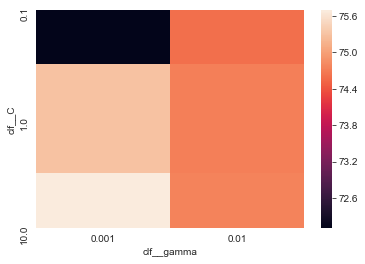

In [31]:
sns.heatmap(pd.pivot_table(opt_svm,index='clf__C',columns='clf__gamma',values='mean_train_score')*100)


<b>Observations</b>
From the out put of the initial broad model has shown that the the best kernel is the Radial basis function kernel, showing the best mean test score for ... setting of the other hyper-parameters.

Gaussian RBF:
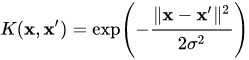

For the hyper-parameter C it need to to be further increase as the 10 was the highest. On the next run we will increase the value range from 10 to 20. 

For gamma, 0.001 gave the best value. There for opposite to C, we will decrease its value to range with 0.0001 minimum.


* Radial basis function kernel


* Best model was 'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'

* Therefore there needs to run a model with:
    * C > 10 
    * gamma < 0.001 
    * Kernal = RBF

In [32]:
y_pred = best_model.predict(X_val)
acc(y_val,y_pred)

NameError: name 'best_model' is not defined

## Polynomial Model

In [41]:
# Construct pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123, max_iter=10000))])

# Set grid search params
param_grid_svm = [
    {'clf__C': [0.1, 1, 10, 100], 'clf__gamma': [0.0001, 0.001, 0.01], 'clf__kernel': ['poly'], 'clf__degree': [3, 4, 5]}]

#  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
#  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
#  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['sigmoid']}

# Construct grid search
gs_svm_poly = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='roc_auc',
            cv=3, verbose=2, return_train_score = True, n_jobs=1)

gs_svm_poly.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.0001, clf__kernel=poly ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.0001, clf__kernel=poly, total=  17.0s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.0001, clf__kernel=poly ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.0001, clf__kernel=poly, total=  17.6s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.0001, clf__kernel=poly ..


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.0001, clf__kernel=poly, total=  15.1s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.001, clf__kernel=poly, total=  12.9s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.001, clf__kernel=poly, total=  21.6s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.001, clf__kernel=poly, total=  20.6s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.01, clf__kernel=poly ....


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.01, clf__kernel=poly, total=  11.6s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.01, clf__kernel=poly ....


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.01, clf__kernel=poly, total=  12.3s
[CV] clf__C=0.1, clf__degree=3, clf__gamma=0.01, clf__kernel=poly ....


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=3, clf__gamma=0.01, clf__kernel=poly, total=  14.2s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.0001, clf__kernel=poly ..


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.0001, clf__kernel=poly, total=  11.8s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.0001, clf__kernel=poly ..


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.0001, clf__kernel=poly, total=  12.2s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.0001, clf__kernel=poly ..


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.0001, clf__kernel=poly, total=  13.5s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.001, clf__kernel=poly, total=  14.5s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.001, clf__kernel=poly, total=  13.5s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.001, clf__kernel=poly, total=  16.7s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.01, clf__kernel=poly ....


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.01, clf__kernel=poly, total=  12.0s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.01, clf__kernel=poly ....


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.01, clf__kernel=poly, total=  13.0s
[CV] clf__C=0.1, clf__degree=4, clf__gamma=0.01, clf__kernel=poly ....


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=4, clf__gamma=0.01, clf__kernel=poly, total=  13.3s
[CV] clf__C=0.1, clf__degree=5, clf__gamma=0.0001, clf__kernel=poly ..


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=5, clf__gamma=0.0001, clf__kernel=poly, total=  11.3s
[CV] clf__C=0.1, clf__degree=5, clf__gamma=0.0001, clf__kernel=poly ..


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=5, clf__gamma=0.0001, clf__kernel=poly, total=  12.6s
[CV] clf__C=0.1, clf__degree=5, clf__gamma=0.0001, clf__kernel=poly ..


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=5, clf__gamma=0.0001, clf__kernel=poly, total=  12.2s
[CV] clf__C=0.1, clf__degree=5, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=5, clf__gamma=0.001, clf__kernel=poly, total=  11.5s
[CV] clf__C=0.1, clf__degree=5, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=5, clf__gamma=0.001, clf__kernel=poly, total=  12.8s
[CV] clf__C=0.1, clf__degree=5, clf__gamma=0.001, clf__kernel=poly ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  clf__C=0.1, clf__degree=5, clf__gamma=0.001, clf__kernel=poly, total=  12.2s
[CV] clf__C=0.1, clf__degree=5, clf__gamma=0.01, clf__kernel=poly ....


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
best_model = gs_svm_poly.best_estimator_
# scores(best_model,X_train_smote,X_val,y_train_smote,y_val)
print(gs_svm_poly.best_params_)

In [ ]:
opt_svm_poly = GS_Output_DataFrame(gs_svm_poly)
opt_svm_poly

In [ ]:
# # Fit using grid search
# gs_svm.fit(X_train, y_train)


# best_model = gs_svm.best_estimator_

# scores(best_model,X_train,X_val,y_train,y_val)

# # Best accuracy
# print('Best accuracy: %.3f' % gs_svm.best_score_)

# # Best params
# print('\nBest params:\n', gs_svm.best_params_)
# opt_plots(best_model)

In [ ]:
y_pred = gs_svm.predict(X_val)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

In [ ]:
best_model = gs_svm.best_params_

## Tight SVM

In [54]:
# Construct pipeline
pipe_svm_2 = Pipeline([('clf', svm.SVC(random_state=123, max_iter=10000))])

# Set grid search params
param_grid_svm_2 = [{'clf__C': [10, 15, 20], 'clf__gamma': [0.0001, 0.001], 'clf__kernel': ['rbf']}]

#  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
#  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
#  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['sigmoid']}
#  {'clf__C': [0.1, 1, 10, 100], 'clf__gamma': [0.0001, 0.001, 0.01], 'clf__kernel': ['poly'], 'clf__degree': [3, 4, 5]}
    

# Construct grid search
                    
gs_svm_2 = GridSearchCV(estimator=pipe_svm_2, param_grid=param_grid_svm_2, scoring='roc_auc',
            cv=3, verbose=2, return_train_score = True, n_jobs=1)

gs_svm_2.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] clf__C=10, clf__gamma=0.0001, clf__kernel=rbf ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=10, clf__gamma=0.0001, clf__kernel=rbf, total= 2.7min
[CV] clf__C=10, clf__gamma=0.0001, clf__kernel=rbf ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=10, clf__gamma=0.0001, clf__kernel=rbf, total= 2.7min
[CV] clf__C=10, clf__gamma=0.0001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=10, clf__gamma=0.0001, clf__kernel=rbf, total= 2.7min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=15, clf__gamma=0.0001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=15, clf__gamma=0.0001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=15, clf__gamma=0.0001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=15, clf__gamma=0.0001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=15, clf__gamma=0.0001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=15, clf__gamma=0.0001, clf__kernel=rbf, total= 2.6min
[CV] clf__C=15, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=15, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=15, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=15, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=15, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=15, clf__gamma=0.001, clf__kernel=rbf, total= 2.5min
[CV] clf__C=20, clf__gamma=0.0001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=20, clf__gamma=0.0001, clf__kernel=rbf, total= 2.4min
[CV] clf__C=20, clf__gamma=0.0001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=20, clf__gamma=0.0001, clf__kernel=rbf, total= 2.6min
[CV] clf__C=20, clf__gamma=0.0001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=20, clf__gamma=0.0001, clf__kernel=rbf, total= 2.4min
[CV] clf__C=20, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=20, clf__gamma=0.001, clf__kernel=rbf, total= 2.6min
[CV] clf__C=20, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=20, clf__gamma=0.001, clf__kernel=rbf, total= 2.6min
[CV] clf__C=20, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=20, clf__gamma=0.001, clf__kernel=rbf, total= 2.7min


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 70.9min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=10000,
                                            probability=False, random_state=123,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid=[{'clf__C': [10, 15, 20], 'clf__gamma': [0.0001, 0.001],
                          'clf__kernel': ['rbf']}],
             pr

In [55]:
best_model = gs_svm_2.best_estimator_
# scores(best_model,X_train_smote,X_val,y_train_smote,y_val)
print(gs_svm_2.best_params_)

{'clf__C': 20, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}


Save the model

In [129]:
svm_model = pickle.dumps(gs_svm_2)

In [130]:
from joblib import dump, load
dump(gs_svm_2, 'svm_model.joblib') 

['svm_model.joblib']

In [56]:
opt_svm_2 = GS_Output_DataFrame(gs_svm_2)
opt_svm_2

,clf__C,clf__gamma,clf__kernel,mean_test_score,std_test_score,mean_train_score,std_train_score
0,10,0.0001,rbf,0.998135,0.000092,0.999076,0.000087
1,10,0.0010,rbf,0.997896,0.000156,0.999849,0.000004
2,15,0.0001,rbf,0.998717,0.000019,0.999567,0.000028
3,15,0.0010,rbf,0.998145,0.000094,0.999938,0.000003
4,20,0.0001,rbf,0.998900,0.000047,0.999695,0.000063
5,20,0.0010,rbf,0.998220,0.000071,0.999964,0.000006


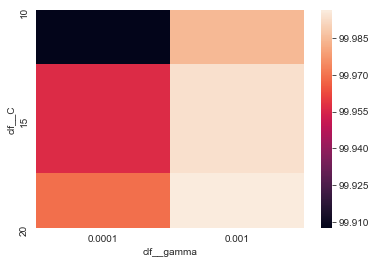

In [57]:
sns.heatmap(pd.pivot_table(opt_svm_2,index='clf__C',columns='clf__gamma',values='mean_train_score')*100)

The model has not really improved much on the with the improvement only being 0.1%

In [63]:
y_pred = best_model.predict(X_val)

In [92]:
model_metrics(y_val, y_pred)

Precision: 16.792%
Recall: 68.367%


array([[59380,   332],
       [   31,    67]])

In [104]:
cnf_matrix = confusion_matrix(y_val, y_pred)
cnf_matrix

array([[59380,   332],
       [   31,    67]])

In [107]:
cnf_matrix[1].sum()

98

In [108]:
y_val.sum()

98

In [66]:
import itertools
def plot_confusion_matix(y_val, y_pred, classes):
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print('\n clasification report:\n', classification_report(y_val,y_pred))
    print("-----------------------------------------------")
    print(f"Accuracy: {round(accuracy*100,3)}%")
    print(f"Precision: {round(precision*100,3)}%")
    print(f"Recall: {round(recall*100,3)}%")
    print(f"f1_score: {round(f1*100,3)}%")

    cnf_matrix = confusion_matrix(y_val, y_pred)
    print(f"Frauds: {y_val.sum()} | Missed: {round((cnf_matrix[1][0]/y_val.sum())*100,1)}%")
    
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    class_names = ['',classes[0],'',classes[1],'']# set(y) # Get class labels to add to matrix
    tick_marks = [-0.5,0,0.5,1,1.5]
    
    # Add appropriate axis scales
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')

    # Add a legend
    plt.colorbar()
    plt.show()


 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     59712
           1       0.05      0.65      0.10        98

    accuracy                           0.98     59810
   macro avg       0.53      0.82      0.54     59810
weighted avg       1.00      0.98      0.99     59810

-----------------------------------------------
Accuracy: 98.064%
Precision: 5.387%
Recall: 65.306%
f1_score: 9.953%
Frauds: 98 | Missed: 34.7%


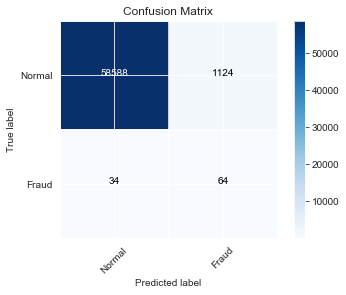

In [67]:
plot_confusion_matix(y_val, y_pred, ['Normal', "Fraud"])

### No balancing of classes

In [105]:
# Construct pipeline
pipe_svm_ub = Pipeline([('clf', svm.SVC(random_state=123, max_iter=10000))])

# Set grid search params
param_grid_svm_ub = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
  {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['sigmoid']}]


gs_svm_ub = GridSearchCV(estimator=pipe_svm_ub, param_grid=param_grid_svm_ub, scoring='roc_auc',
            cv=3, verbose=2, return_train_score = True, n_jobs=1)

gs_svm_ub.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... clf__C=0.1, clf__kernel=linear, total=   3.7s
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... clf__C=0.1, clf__kernel=linear, total=   3.7s
[CV] clf__C=0.1, clf__kernel=linear ..................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... clf__C=0.1, clf__kernel=linear, total=   3.6s
[CV] clf__C=1, clf__kernel=linear ....................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... clf__C=1, clf__kernel=linear, total=   3.6s
[CV] clf__C=1, clf__kernel=linear ....................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... clf__C=1, clf__kernel=linear, total=   3.6s
[CV] clf__C=1, clf__kernel=linear ....................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... clf__C=1, clf__kernel=linear, total=   3.6s
[CV] clf__C=10, clf__kernel=linear ...................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... clf__C=10, clf__kernel=linear, total=   3.8s
[CV] clf__C=10, clf__kernel=linear ...................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... clf__C=10, clf__kernel=linear, total=   3.9s
[CV] clf__C=10, clf__kernel=linear ...................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... clf__C=10, clf__kernel=linear, total=   3.9s
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf ...................
[CV] .... clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf, total= 1.6min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .... clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf, total= 1.2min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf ...................
[CV] .... clf__C=0.1, clf__gamma=0.001, clf__kernel=rbf, total= 1.7min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf, total= 1.3min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf, total= 1.3min
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=0.1, clf__gamma=0.01, clf__kernel=rbf, total= 1.2min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total= 1.2min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total= 1.2min
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total= 1.2min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=rbf ......................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... clf__C=1, clf__gamma=0.01, clf__kernel=rbf, total= 1.2min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=rbf ......................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... clf__C=1, clf__gamma=0.01, clf__kernel=rbf, total= 1.3min
[CV] clf__C=1, clf__gamma=0.01, clf__kernel=rbf ......................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... clf__C=1, clf__gamma=0.01, clf__kernel=rbf, total= 1.2min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 1.2min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 1.2min
[CV] clf__C=10, clf__gamma=0.001, clf__kernel=rbf ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..... clf__C=10, clf__gamma=0.001, clf__kernel=rbf, total= 1.2min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 1.3min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 1.3min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 1.3min
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid ...............
[CV]  clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid, total=   2.5s
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid ...............
[CV]  clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid, total=   1.9s
[CV] clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid ...............
[CV]  clf__C=0.1, clf__gamma=0.001, clf__kernel=sigmoid, total=   2.0s
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid ................
[CV] . clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid, total=   1.7s
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid ................
[CV] . clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid, total=   1.7s
[CV] clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid ................
[CV] . clf__C=0.1, clf__gamma=0.01, clf__kernel=sigmoid, total=   1.7s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=sigmoid .................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 32.3min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=10000,
                                            probability=False, random_state=123,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid=[{'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear']},
                         {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001

In [ ]:
# gs_svm_ub = load('svm_model.joblib') 
# gs_svm_ub.fit(X_train, y_train)

In [106]:
best_model = gs_svm_ub.best_estimator_
# scores(best_model,X_train_smote,X_val,y_train_smote,y_val)
print(gs_svm_ub.best_params_)

{'clf__C': 0.1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


In [108]:
opt_svm_ub = GS_Output_DataFrame(gs_svm_ub)
opt_svm_ub

,clf__C,clf__kernel,clf__gamma,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.1,linear,NaN,0.646444,0.020303,0.645467,3.401752e-02
1,1.0,linear,NaN,0.722944,0.106702,0.713208,1.081592e-01
2,10.0,linear,NaN,0.674326,0.079042,0.685425,8.611685e-02
3,0.1,rbf,0.001,0.763401,0.008715,0.999999,1.150262e-06
4,0.1,rbf,0.010,0.721235,0.040163,1.000000,0.000000e+00
5,1.0,rbf,0.001,0.761821,0.013057,0.999999,1.099148e-06
6,1.0,rbf,0.010,0.720912,0.039545,1.000000,0.000000e+00
7,10.0,rbf,0.001,0.761663,0.011018,1.000000,5.924756e-07
8,10.0,rbf,0.010,0.730130,0.040701,1.000000,6.409876e-17
9,0.1,sigmoid,0.001,0.553628,0.024523,0.558453,6.478590e-03


In [110]:
y_pred = best_model.predict(X_val)
# y_prob = best_model.predict_proba(X_val)

Predict

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59712
           1       0.00      0.00      0.00        98

    accuracy                           1.00     59810
   macro avg       0.50      0.50      0.50     59810
weighted avg       1.00      1.00      1.00     59810

-----------------------------------------------
Accuracy: 99.836%
Precision: 0.0%
Recall: 0.0%
f1_score: 0.0%
Frauds: 98 | Missed: 100.0%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


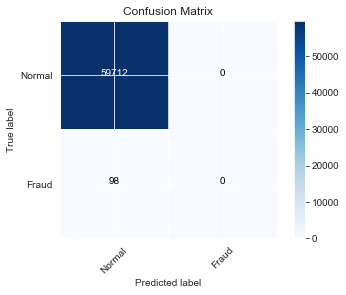

In [111]:
print("Predict")
plot_confusion_matix(y_val, y_pred, ['Normal', "Fraud"])

In [112]:
# print("Probability")
# plot_confusion_matix(y_val, y_prob , ['Normal', "Fraud"])

## XGBoost

In [72]:
from xgboost import XGBClassifier

In [74]:
# pipe_xg = Pipeline('clf', XGBClassifier(random_state=123))

In [83]:
param_grid_xg = {
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [2, 3, 4],
    'subsample': [0.5, 0.7, 0.9],
    'n_estimators': [100],
}

In [84]:
gs_xg = GridSearchCV(estimator=XGBClassifier(random_state=123),
            param_grid=param_grid_xg,
            scoring='roc_auc',
            cv=3, verbose=1, return_train_score = True,  n_jobs=1)

gs_xg.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 585.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=123, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [4, 6, 8, 10],
                         'min

In [85]:
best_model = gs_xg.best_estimator_
# scores(best_model,X_train_smote,X_val,y_train_smote,y_val)
print(gs_xg.best_params_)

{'learning_rate': 0.4, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.9}


In [86]:
xgboost_model = pickle.dumps(gs_xg)

In [87]:
from joblib import dump, load
dump(gs_xg, 'xgboost_model.joblib') 

['xgboost_model.joblib']

In [88]:
opt_xg = GS_Output_DataFrame(gs_xg)
opt_xg

,learning_rate,max_depth,min_child_weight,n_estimators,subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.2,4,2,100,0.5,0.999965,0.000014,0.999993,1.522461e-06
1,0.2,4,2,100,0.7,0.999973,0.000007,0.999995,5.439216e-07
2,0.2,4,2,100,0.9,0.999965,0.000019,0.999995,8.498439e-07
3,0.2,4,3,100,0.5,0.999960,0.000010,0.999991,2.740694e-07
4,0.2,4,3,100,0.7,0.999969,0.000016,0.999993,1.064818e-06
...,...,...,...,...,...,...,...,...,...
103,0.4,10,3,100,0.7,0.999976,0.000018,1.000000,0.000000e+00
104,0.4,10,3,100,0.9,0.999976,0.000010,1.000000,0.000000e+00
105,0.4,10,4,100,0.5,0.999978,0.000015,1.000000,2.154082e-08
106,0.4,10,4,100,0.7,0.999974,0.000016,1.000000,0.000000e+00


In [89]:
y_pred = best_model.predict(X_val)


 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59712
           1       0.72      0.85      0.78        98

    accuracy                           1.00     59810
   macro avg       0.86      0.92      0.89     59810
weighted avg       1.00      1.00      1.00     59810

-----------------------------------------------
Accuracy: 99.92%
Precision: 71.552%
Recall: 84.694%
f1_score: 77.57%
Frauds: 98 | Missed: 15.3%


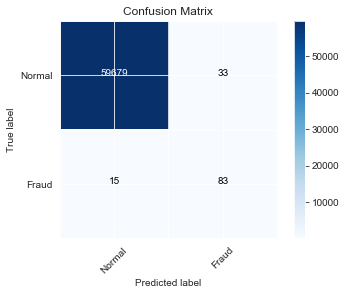

In [90]:
plot_confusion_matix(y_val, y_pred, ['Normal', "Fraud"])

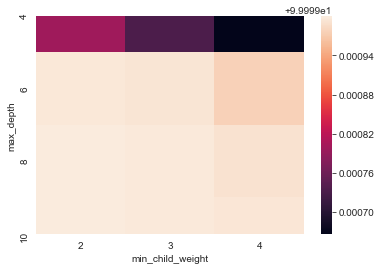

In [92]:
sns.heatmap(pd.pivot_table(opt_xg,index='max_depth',
                           columns='min_child_weight',
                           values='mean_train_score')*100)

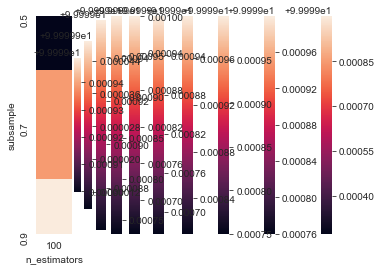

In [99]:
xg_keys = list(itertools.combinations((param_grid_xg.keys()), 2))
i=0
fig = plt.figure(figsize=(18,8))
plt.subplot2grid(shape, loc, rowspan=len(xg_keys/2), colspan=(xg_keys/2), fig=fig)
for x in xg_keys:
    plt.su
    sns.heatmap(pd.pivot_table(opt_xg,index=x[0],
                           columns=x[1],
                           values='mean_train_score')*100)


## Random Forest Model

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create Pipline
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {#'clf__n_estimators': [10, 100, 200],
   #'clf__criterion': ['gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   #'clf__min_samples_split':[None, 0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='roc_auc',
            cv=3, verbose=2, return_train_score = True,  n_jobs=-1)

# Fit using grid search
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

In [114]:
best_model = gs_rf.best_estimator_
print('\nBest params:\n', gs_rf.best_params_)


Best params:
 {'clf__max_depth': 5, 'clf__min_samples_leaf': 0.1}


In [115]:
opt_rf = GS_Output_DataFrame(gs_rf)
opt_rf

,clf__max_depth,clf__min_samples_leaf,mean_test_score,std_test_score,mean_train_score,std_train_score
0,4,0.05,0.966014,0.000745,0.971070,0.000445
1,4,0.10,0.967878,0.012041,0.972148,0.004431
2,4,0.20,0.967395,0.010161,0.972107,0.004056
3,5,0.05,0.966002,0.000785,0.971743,0.000325
4,5,0.10,0.967889,0.012034,0.972159,0.004434
5,5,0.20,0.967395,0.010161,0.972107,0.004056
6,6,0.05,0.966089,0.000701,0.971864,0.000332
7,6,0.10,0.967889,0.012034,0.972159,0.004434
8,6,0.20,0.967395,0.010161,0.972107,0.004056


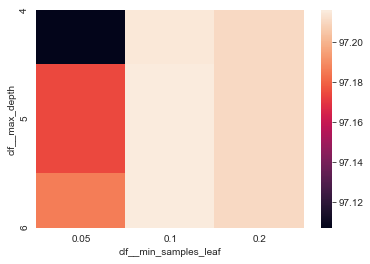

In [116]:
sns.heatmap(pd.pivot_table(opt_rf,index='clf__max_depth',
                           columns='clf__min_samples_leaf',
                           values='mean_train_score')*100)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 99.836%
Precision: 0.0%
Recall: 0.0%
f1_score: 0.0%
Frauds: 98 | Missed: 100.0%


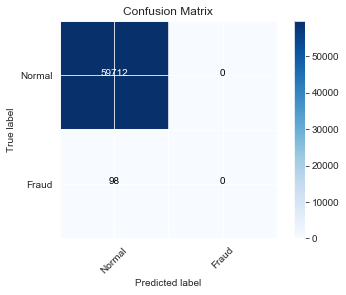

In [119]:
y_pred = best_model.predict(X_val)
plot_confusion_matix(y_val, y_pred, ['Normal', "Fraud"])